In [87]:
#rank-2860

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df_train = pd.read_csv(r'C:\Users\hp\Desktop\house_price_kaggle/train.csv')
df_test = pd.read_csv(r'C:\Users\hp\Desktop\house_price_kaggle/test.csv')

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


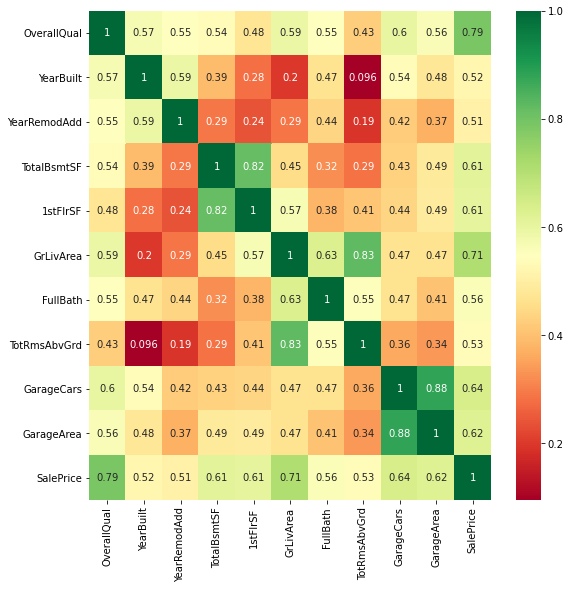

In [56]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

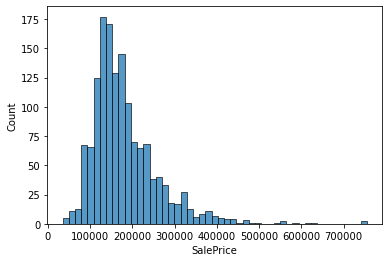

In [123]:
sns.histplot(df_train['SalePrice'])
#right skewed

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

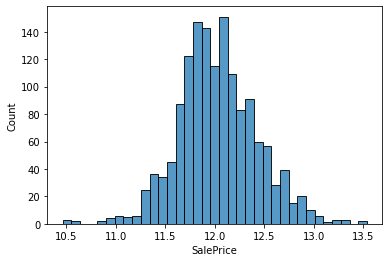

In [124]:
sns.histplot(np.log1p(df_train['SalePrice']))

In [125]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [126]:
Sale_Price=df_train.iloc[:,80]
Sale_Price.shape

(1460,)

In [127]:
#droping SalePrice column
df_train1=df_train.drop(["SalePrice"],axis=1)
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [128]:
# combining training & testing data for preposesing after that we do not write same code for test

data= pd.concat([df_train1,df_test], keys=['x', 'y'])#here X is training data and Y testing data
data=data.drop(["Id"],axis=1)

In [11]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0          60       RL         65.0     8450   Pave   NaN      Reg   
  1          20       RL         80.0     9600   Pave   NaN      Reg   
  2          60       RL         68.0    11250   Pave   NaN      IR1   
  3          70       RL         60.0     9550   Pave   NaN      IR1   
  4          60       RL         84.0    14260   Pave   NaN      IR1   

    LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
x 0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
  1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
  2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
  3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
  4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

    MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
x 0         NaN       0       2    2008        WD         Normal  
  1         NaN       0       5    2007        WD         Normal  
  2         NaN       0       9    2008        WD         Normal  
  3         NaN       0       2    2006        WD        Abnorml  
  4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [12]:
data.shape

(2919, 79)

In [ ]:
# Dealing with null values

In [129]:
total_null = data.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) #Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [130]:
data = data.drop((missing_data[missing_data["Percentage"] > 0.05]).index,1) 

data.isnull().sum().sort_values(ascending=False)

BsmtCond        82
BsmtExposure    82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
                ..
2ndFlrSF         0
1stFlrSF         0
CentralAir       0
HeatingQC        0
MSSubClass       0
Length: 68, dtype: int64

In [131]:
num_col=data._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [132]:
cat_col=set(data.columns)-set(num_col)
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [133]:
for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)

In [134]:
for col in cat_col:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [135]:
data.isnull().sum().max()

0

In [29]:
#count total value in every catgorical feature
for i in cat_col:
    print(data[i].value_counts())

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64
Unf    930
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Na

In [34]:
#count total value in every numerical feature
for i in num_col:
    print(data[i].value_counts())

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292     1
Name: LotArea, Length: 1951, dtype: int64
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int

In [136]:
df=data.drop(["RoofMatl","Heating","Condition2","BsmtCond","SaleType",
                "CentralAir","Functional","Electrical","LandSlope","ExterCond","Condition1",
               "GarageArea","BsmtUnfSF","3SsnPorch","MiscVal","PoolArea","ScreenPorch","KitchenAbvGr","BsmtHalfBath","LowQualFinSF"],axis=1) 

In [101]:
df.shape

(2919, 48)

In [137]:
df=df.drop(["Utilities","PavedDrive"],axis=1)

In [103]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SaleCondition'],
      dtype='object')

In [138]:
df.shape

(2919, 46)

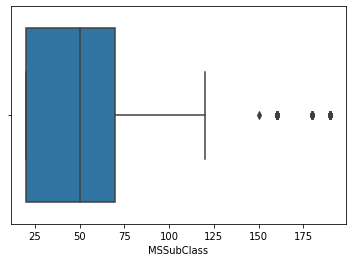

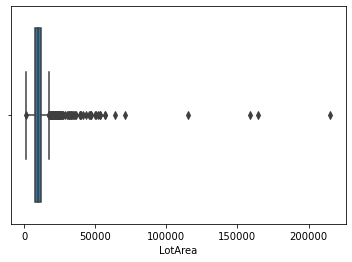

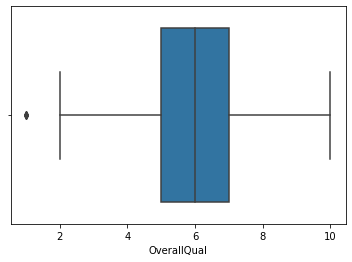

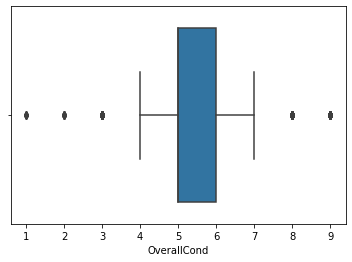

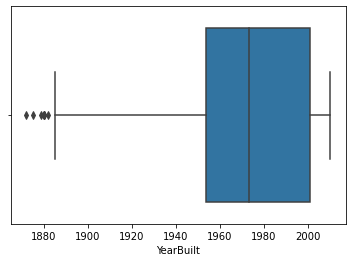

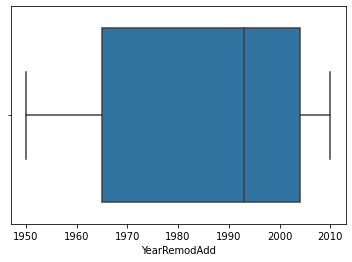

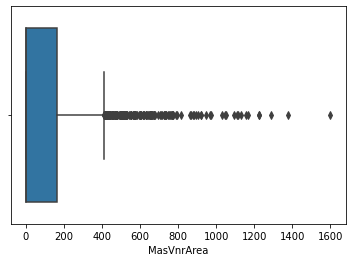

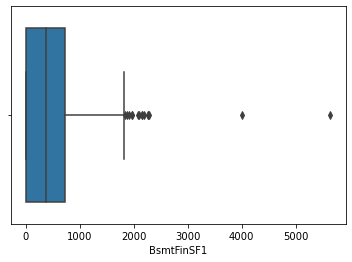

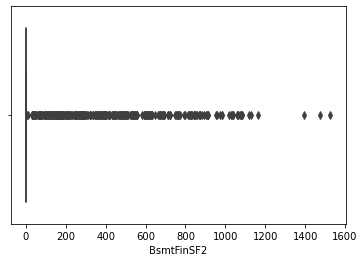

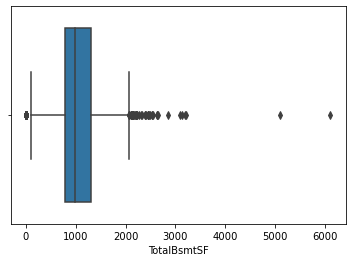

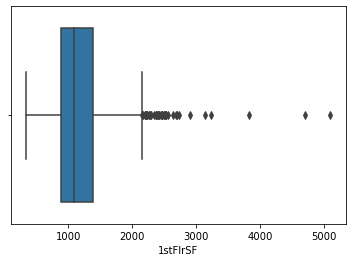

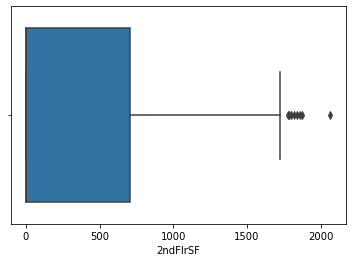

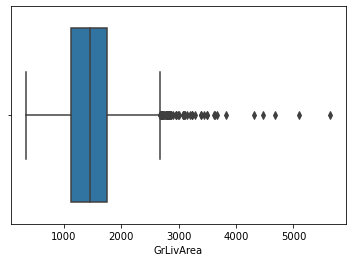

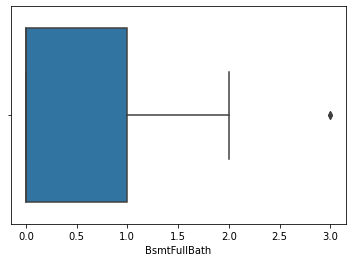

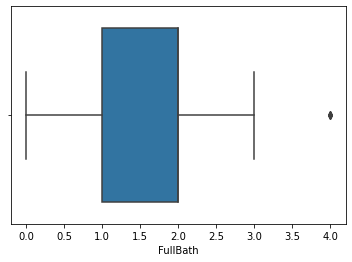

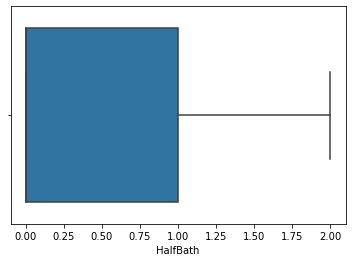

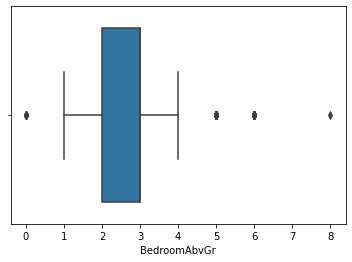

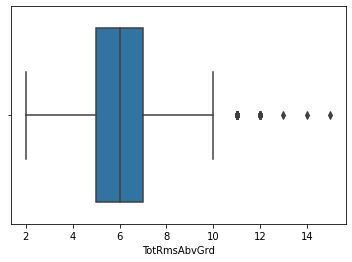

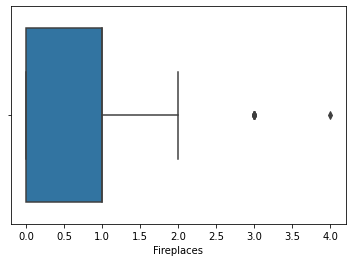

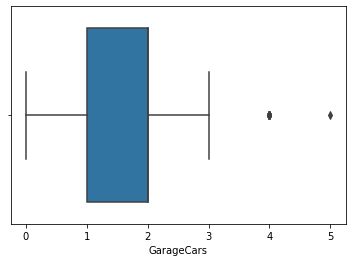

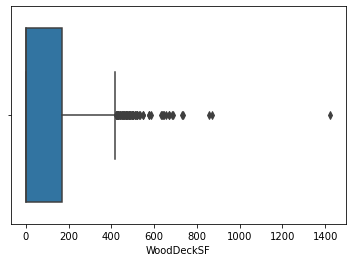

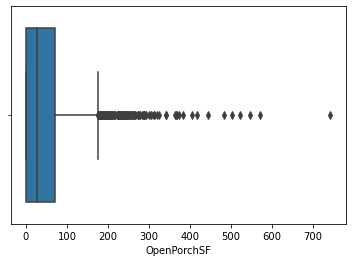

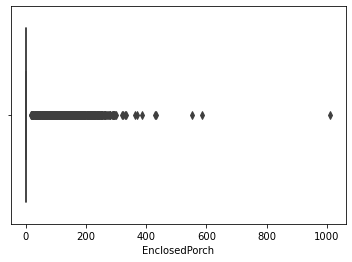

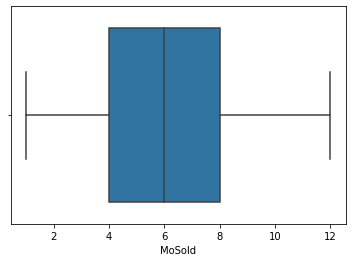

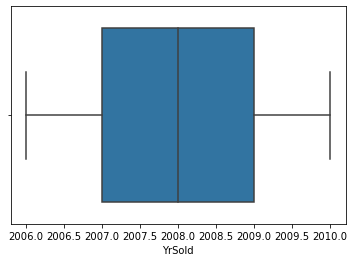

In [139]:
n_features = df.select_dtypes(exclude = ["object"]).columns
#there are many outliers
for i in df[n_features]:
    sns.boxplot(x=df[i])
    plt.show()

In [140]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

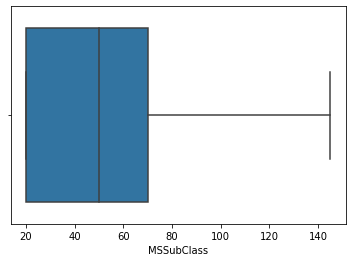

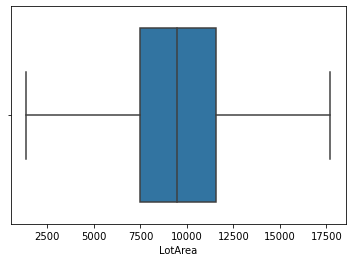

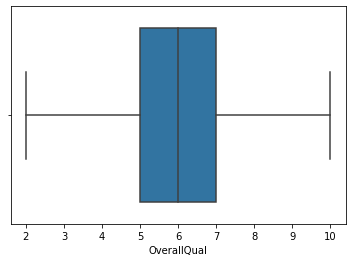

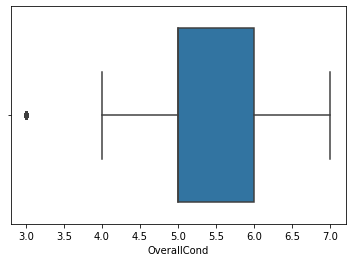

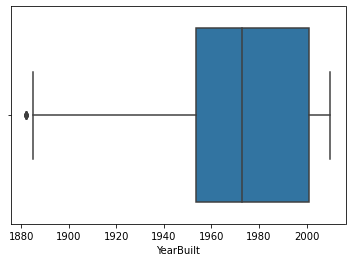

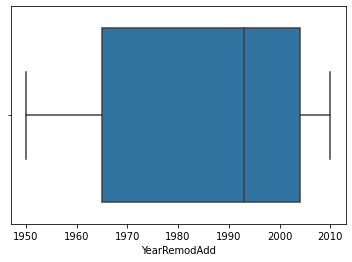

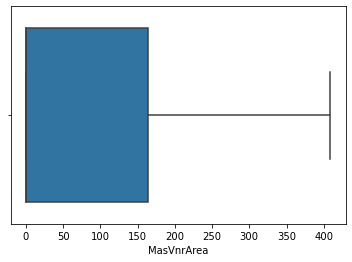

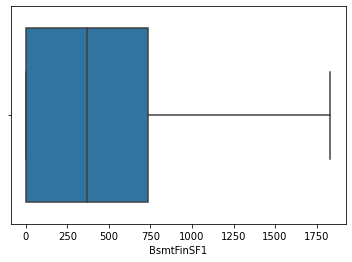

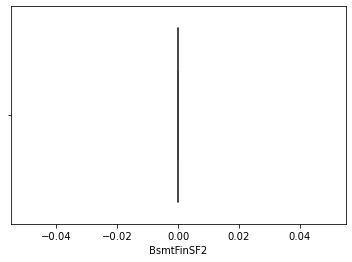

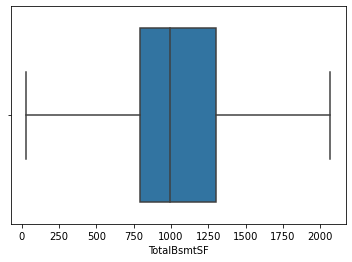

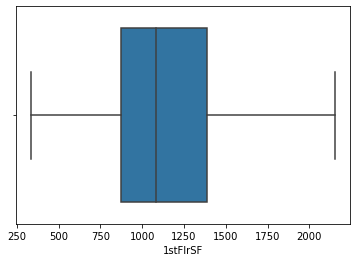

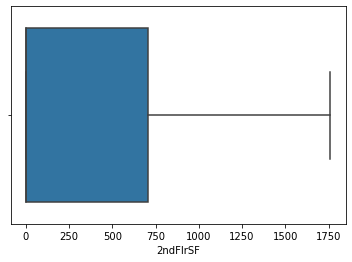

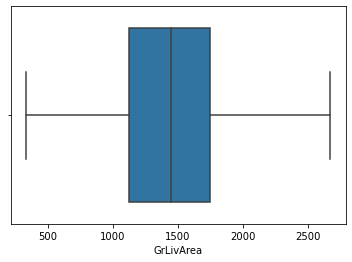

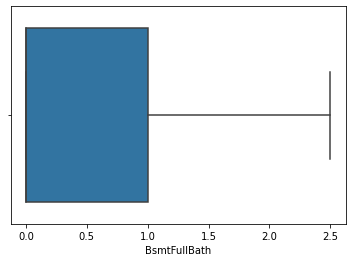

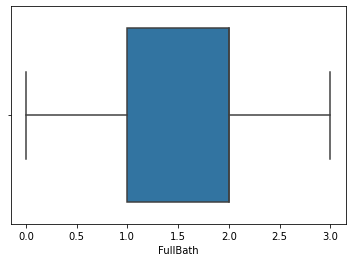

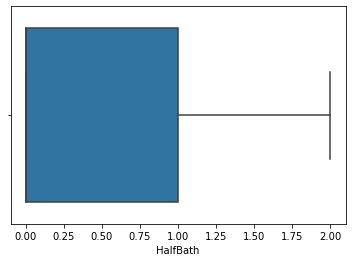

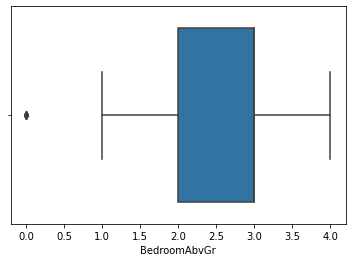

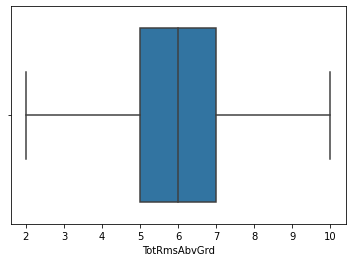

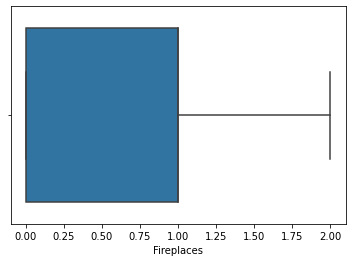

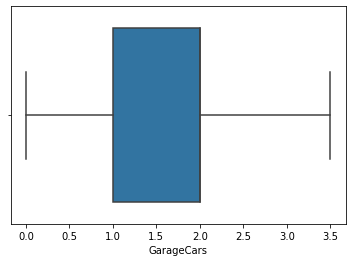

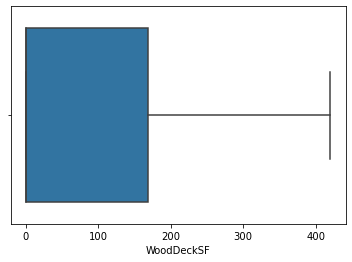

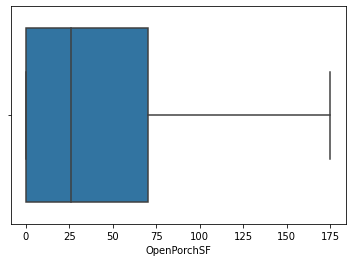

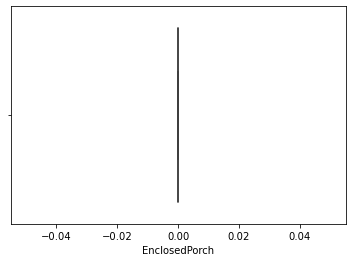

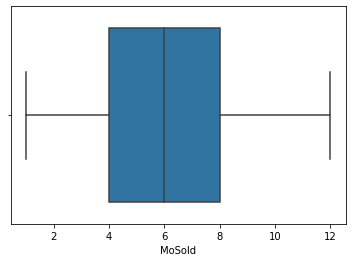

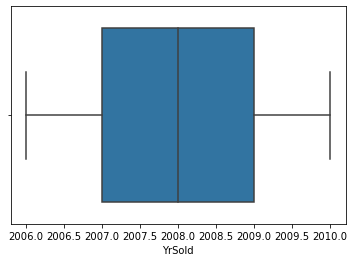

In [141]:
#after removal
for i in df[n_features]:
    sns.boxplot(x=df[i])
    plt.show()

In [106]:
df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
x 0          60       RL     8450   Pave      Reg         Lvl    Inside   
  1          20       RL     9600   Pave      Reg         Lvl       FR2   
  2          60       RL    11250   Pave      IR1         Lvl    Inside   
  3          70       RL     9550   Pave      IR1         Lvl    Corner   
  4          60       RL    14260   Pave      IR1         Lvl       FR2   

    Neighborhood BldgType HouseStyle  ...  KitchenQual  TotRmsAbvGrd  \
x 0      CollgCr     1Fam     2Story  ...           Gd             8   
  1      Veenker     1Fam     1Story  ...           TA             6   
  2      CollgCr     1Fam     2Story  ...           Gd             6   
  3      Crawfor     1Fam     2Story  ...           Gd             7   
  4      NoRidge     1Fam     2Story  ...           Gd             9   

     Fireplaces  GarageCars WoodDeckSF OpenPorchSF EnclosedPorch MoSold  \
x 0           0         2.0          0          61             0      2   
  1           1         2.0        298           0             0      5   
  2           1         2.0          0          42             0      9   
  3           1         3.0          0          35             0      2   
  4           1         3.0        192          84             0     12   

     YrSold SaleCondition  
x 0    2008        Normal  
  1    2007        Normal  
  2    2008        Normal  
  3    2006       Abnorml  
  4    2008        Normal  

[5 rows x 46 columns]

In [107]:
X=pd.get_dummies(df)
X.shape

(2919, 169)

In [108]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X = pd.DataFrame(Scaler.fit_transform(X))

In [109]:
X

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,0.123492,-0.311935,0.647263,-0.537035,1.047001,0.896833,0.806978,0.611502,0.0,-0.464496,...,-0.274835,-0.156748,1.239377,-1.023223,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.935170,0.006504,-0.064361,1.631161,0.154585,-0.395604,-0.666160,1.232759,0.0,0.531031,...,-0.274835,-0.156748,-0.806857,0.977304,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.123492,0.463393,0.647263,-0.537035,0.980896,0.848965,0.551434,0.109015,0.0,-0.307565,...,-0.274835,-0.156748,1.239377,-1.023223,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.388158,-0.007341,0.647263,-0.537035,-1.861616,-0.682812,-0.666160,-0.507674,0.0,-0.709699,...,-0.274835,-0.156748,1.239377,-1.023223,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.123492,1.296871,1.358887,-0.537035,0.947844,0.753229,1.964443,0.495016,0.0,0.244143,...,-0.274835,-0.156748,1.239377,-1.023223,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.373150,-2.115680,-1.487608,1.631161,-0.043730,-0.682812,-0.666160,-1.001025,0.0,-1.224627,...,-0.274835,-0.156748,-0.806857,0.977304,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,2.373150,-2.127310,-1.487608,-0.537035,-0.043730,-0.682812,-0.666160,-0.425449,0.0,-1.224627,...,-0.274835,-0.156748,-0.806857,0.977304,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,-0.935170,2.251632,-0.775984,1.631161,-0.374255,0.561757,-0.666160,1.794631,0.0,0.437854,...,-0.274835,-0.156748,-0.806857,0.977304,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,0.785157,0.239379,-0.775984,-0.537035,0.683424,0.370284,-0.666160,-0.231306,0.0,-0.327182,...,-0.274835,-0.156748,-0.806857,0.977304,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [110]:
train_data = pd.DataFrame(X[:1460])
test_data = pd.DataFrame(X[1460:])

In [111]:
train_data.shape

(1460, 169)

In [112]:
test_data.shape

(1459, 169)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,Sale_Price,test_size=.30,random_state=40)

In [142]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [113]:
result = pd.concat([train_data, df_train["SalePrice"]], axis=1)

In [114]:
from pycaret.regression import *
reg = setup(data =result, target="SalePrice")

,Description,Value
0,session_id,7415
1,Target,SalePrice
2,Original Data,"(1460, 170)"
3,Missing Values,False
4,Numeric Features,27
5,Categorical Features,142
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 165)"


In [115]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0845,0.0162,0.1259,0.8965,0.0098,0.0071,0.0330
huber,Huber Regressor,0.0881,0.0175,0.1304,0.8894,0.0102,0.0074,0.1770
ridge,Ridge Regression,0.0882,0.0176,0.1316,0.8868,0.0103,0.0074,0.0110
gbr,Gradient Boosting Regressor,0.0883,0.0178,0.1324,0.8866,0.0103,0.0074,0.2760
omp,Orthogonal Matching Pursuit,0.0923,0.0187,0.1357,0.8804,0.0105,0.0077,0.0130
lightgbm,Light Gradient Boosting Machine,0.0912,0.0195,0.1388,0.8771,0.0108,0.0076,0.1010
et,Extra Trees Regressor,0.0969,0.0209,0.1436,0.8683,0.0112,0.0081,0.7270
rf,Random Forest Regressor,0.0968,0.0212,0.1447,0.8667,0.0113,0.0081,0.6670
par,Passive Aggressive Regressor,0.1159,0.0261,0.1600,0.8348,0.0124,0.0097,0.0190
knn,K Neighbors Regressor,0.1141,0.0271,0.1635,0.8309,0.0127,0.0095,0.0310


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [116]:
# from sklearn.ensemble import GradientBoostingRegressor
# reg = GradientBoostingRegressor()
# reg.fit(x_train, y_train)

from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(train_data, df_train["SalePrice"])

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [78]:
y_=reg.predict(x_test)

In [80]:
len(y_)

438

In [81]:
reg.score(x_test, y_test)

0.9061840168420593

In [118]:
y__=model.predict(test_data)

In [120]:
y__=np.expm1(y__)

In [121]:
y_pred = pd.DataFrame()

y_pred['Id'] = df_test['Id']
y_pred['SalePrice'] = y__

y_pred.to_csv('attempt3.csv', index = False)